In [1]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(42)
from tqdm import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Plot a decagon (our base figure) 

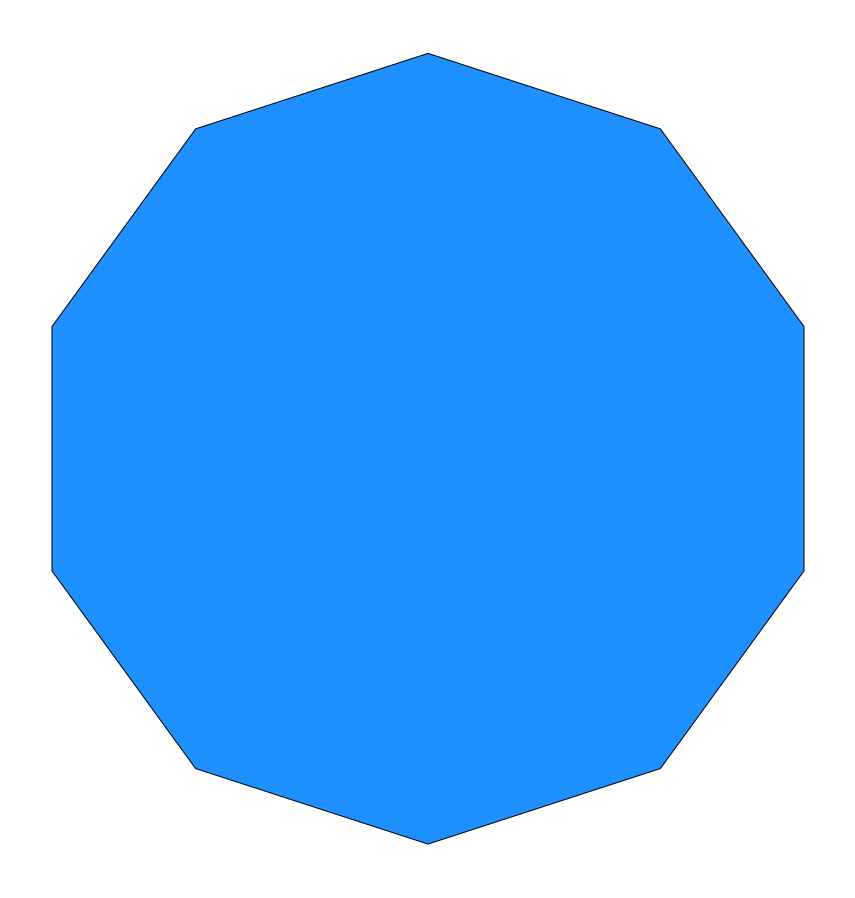

In [3]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(figsize=(8,8))
    t = np.linspace(0, 2*np.pi, 11)
    radius = 5; a=10; b=10
    xs = radius*np.sin(t) + a
    ys = radius*np.cos(t) + b

    ax.fill(xs, ys, color="dodgerblue", ec="k")
    ax.set(aspect=1); ax.set_axis_off()

#### Generate the Water Color Blob

100%|███████████████████████████████████████| 5/5 [00:00<00:00, 30.69it/s]


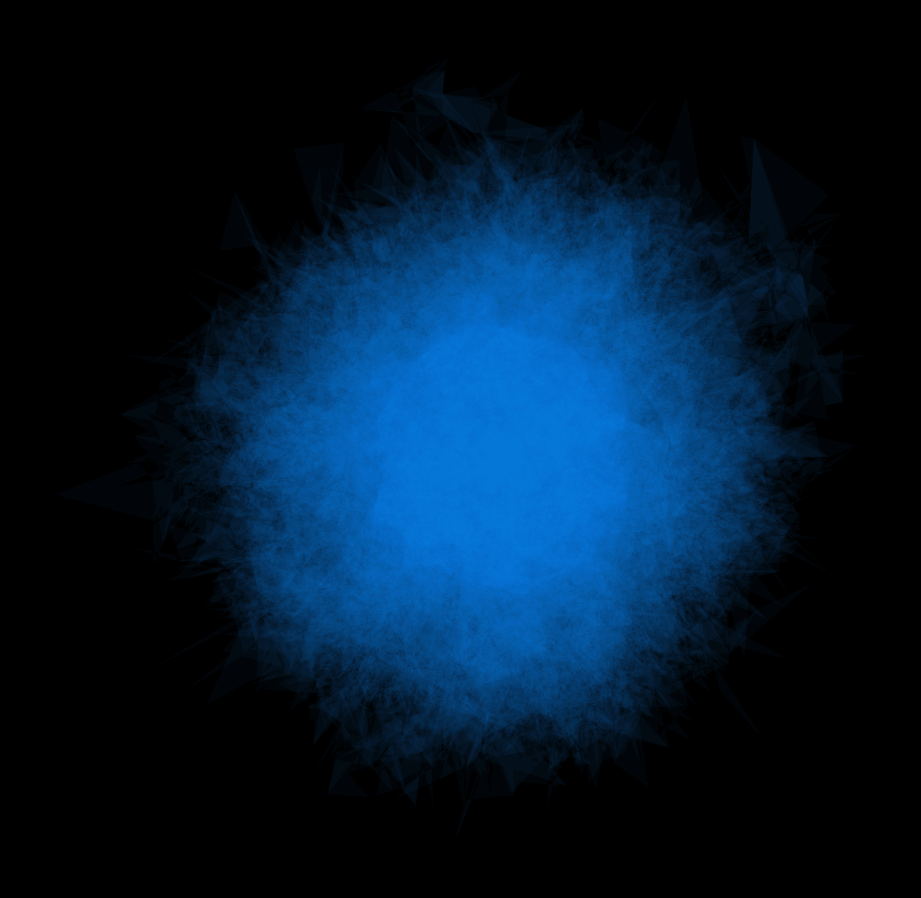

In [4]:
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(8,8)); ax.set_axis_off()    
t = np.linspace(0, 2*np.pi, 11)

def water_color_blob(xs, ys, color, variance, iterations):
    
    """draw a blob using Tyler Hobbs's algorithm: https://tylerxhobbs.com/essays/2017/a-generative-approach-to-simulating-watercolor-paints
    
    Params:
        - xs, ys (1D numpy arrays): array enclosing the points of a polygon
        - color (mpl color str/rgba tuple/hex string): color of blob
        - variance (Boolean): if True, apply low and high variation areas else uniform variance of 0.5 
        - iterations (int): number of recursions (CAUTION: keep this below ~ 15-17)
    """
    
    ## calculate convolving mean with stride 1 
    conv_xs = np.convolve(xs, np.ones(2)/2, mode='valid') ## moving average basically
    new_xs = np.zeros(xs.shape[0]+conv_xs.shape[0]) 
    scale = 0.5 if variance else np.clip(np.random.normal(1, 0.4, size=conv_xs.shape), a_min=0, a_max=2)  
    new_xs[1::2] = np.random.normal(loc=conv_xs, 
                                    scale=scale,
                                    size=conv_xs.shape) ## populate the new array with old and new values (replace A -> C with A -> B, B -> C, 
                                                        ## where B is a random value from a gaussian centered around mid-point of A and C)
    new_xs[::2] = xs
    
    ##do the exact same thing on ys
    conv_ys = np.convolve(ys, np.ones(2)/2, mode='valid')
    new_ys = np.zeros(ys.shape[0]+conv_ys.shape[0])
    new_ys[1::2] = np.random.normal(loc=conv_ys, 
                                    scale=scale,
                                    size=conv_ys.shape)
    new_ys[::2] = ys        
    
    ### plot the new blob with alpha of 4%
    ax.fill(new_xs, new_ys, color=color, alpha=0.04, ec="none")
    
    ##call the function recursively
    if iterations == 1:
        return new_xs, new_ys
    else:
        water_color_blob(new_xs, new_ys, color, variance, iterations-1)
            
def run(epochs, color, a, b, radius, variance):
    """Handler function to plot multiple blobs easily. 
    Params:
        - epochs: number of layers i.e., number of times to run the algorithm for each blob.
    """
    
    xs = radius*np.sin(t) + a
    ys = radius*np.cos(t) + b
    
    for _ in tqdm(range(epochs)):
        water_color_blob(xs, ys, color, variance, 12) ##CAUTION : Don't go above 15 with the iterations

run(5, "dodgerblue", 10, 10, 5, False)

100%|███████████████████████████████████████| 5/5 [00:00<00:00, 35.66it/s]


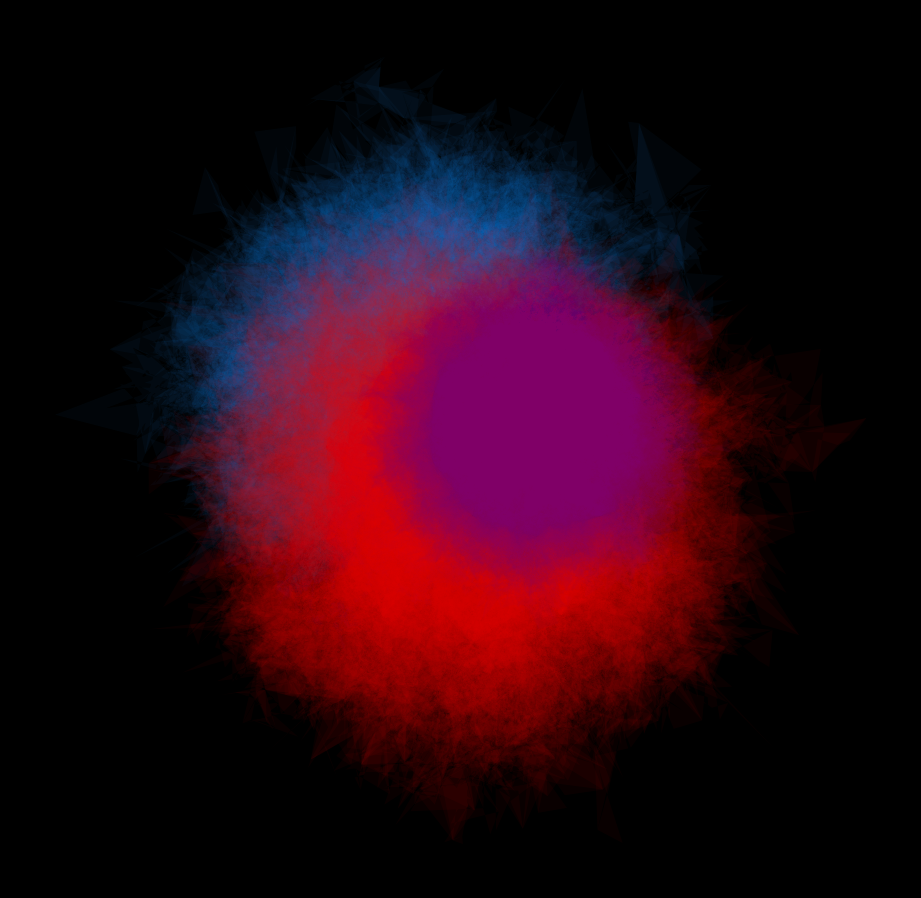

In [6]:
run(5, "red", 12, 5, 7, False)
run(5, "purple", 15, 8, 5, variance=True)

fig

In [7]:
##to save the figure as a png
fig.savefig("test", dpi=220)